In [1]:
import numpy as np
import matplotlib.pyplot as plt
from train import get_parser
from ssd.config.defaults import cfg
from ssd.data.build import make_data_loader
from vizer.draw import draw_boxes
np.random.seed(0)

In [2]:
config_path = "configs/train_waymo_Copy1.yaml"
cfg.merge_from_file(config_path)
cfg.freeze()

In [3]:
data_loader = make_data_loader(cfg, is_train=True)
if isinstance(data_loader, list):
    print(list)
    data_loader = data_loader[0]
dataset = data_loader.dataset
indices = list(range(len(dataset)))
#np.random.shuffle(indices)

17936
Dataset loaded. Subset: train, number of images: 14348


In [ ]:
idx = indices[3]
image = dataset._read_image(idx)
boxes, labels = dataset.get_annotation(idx)
image = draw_boxes(
    image, boxes, labels, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image)
#plt.imsave("visualization.png", image)
#print("Saved the image to visualization.png")

In [ ]:
#The codes above is designed by the TA of tdt4265
#The flowing part is designed by Xiaoyu to understand the data augmentations

In [4]:
from ssd.data.transforms.transforms import *

1


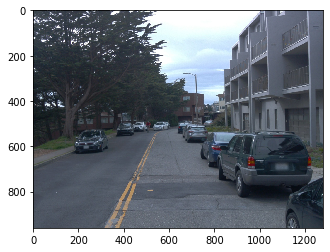

In [9]:
idx = indices[1]
image = dataset._read_image(idx)
plt.imshow(image)
print(idx)

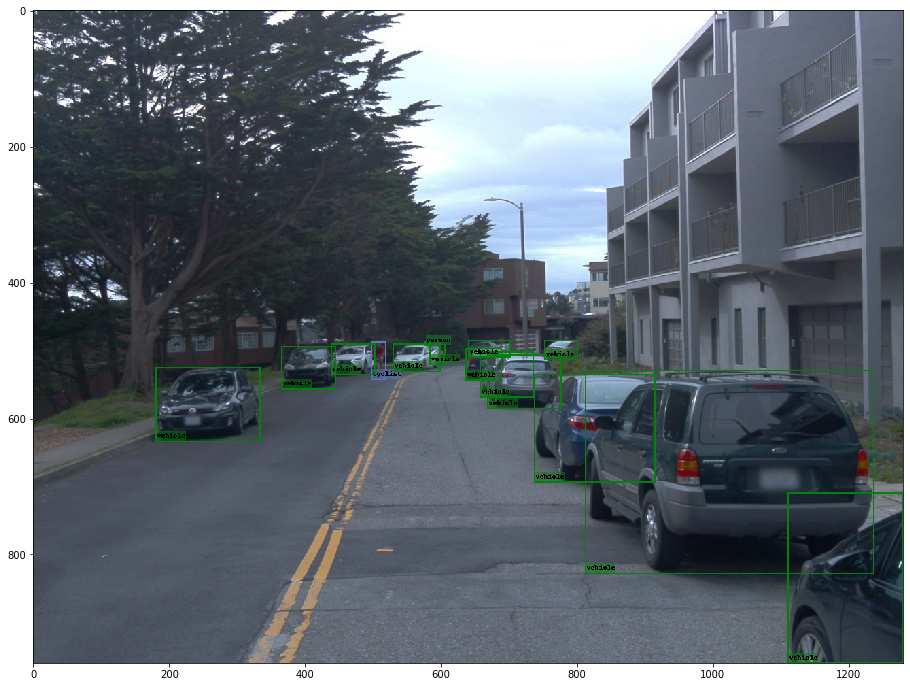

In [12]:
boxes, labels = dataset.get_annotation(idx)
image1 = draw_boxes(
    image, boxes, labels, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image1)

In [66]:
#ConverfromInt
image.shape

(960, 1280, 3)

In [151]:
#Dive into the data loading
import pathlib
from PIL import Image
import json

def _read_image(index):
    data_dir = "datasets/waymo"
    data_dir =pathlib.Path(data_dir)
    image_id = index
    image_path = data_dir.joinpath("images").joinpath(f"{image_id}.jpg")
    image = Image.open(str(image_path)).convert("RGB")
    image = np.array(image)
    return image
def _get_annotation(image_id,labels):
    label = labels[image_id]
    bbox_key = "bounding_boxes"
    if bbox_key not in label:
        bbox_key = "bboxes"
    boxes = np.zeros((len(label[bbox_key]), 4), dtype=np.float32)
    labels = np.zeros((len(label[bbox_key])), dtype=np.int64)
    for idx, bounding_box in enumerate(label[bbox_key]):
        box = [
            bounding_box["xmin"],
            bounding_box["ymin"],
            bounding_box["xmax"],
            bounding_box["ymax"]]
        boxes[idx] = box
        labels[idx] = bounding_box["label_id"]
    # SSD use label 0 as the background. Therefore +1
    labels = labels + 1
    return boxes, labels
def read_labels(label_path):
    assert label_path.is_file(), \
        f"Did not find label file: {label_path.absolute()}"
    with open(label_path, "r") as fp:
        labels = json.load(fp)
    labels_processed = {}
    for label in labels:
        image_id = label["image_id"]
        labels_processed[image_id] = label
    return labels_processed

In [156]:
#get the image '1.jpg' and relating box and label
print(idx)
image_test=_read_image(idx)
data_dir = "datasets/waymo"
data_dir =pathlib.Path(data_dir)
label_total=read_labels(data_dir.joinpath("labels.json"))
label_test=_get_annotation(idx,label_total)
box_test=label_test[0] 
label_test = label_test[1]


1


In [157]:
print('image_test',image_test)
print('label_test',label_test)
print('box_test',box_test)

image_test [[[122 125 158]
  [201 205 232]
  [217 222 241]
  ...
  [104 111 130]
  [105 110 130]
  [103 108 128]]

 [[ 81  84 117]
  [118 122 149]
  [185 190 209]
  ...
  [104 111 130]
  [103 108 128]
  [102 107 127]]

 [[ 70  73 108]
  [ 75  79 108]
  [ 81  86 105]
  ...
  [103 109 131]
  [102 107 129]
  [101 106 128]]

 ...

 [[ 79  87 100]
  [ 79  87 100]
  [ 78  86  99]
  ...
  [ 44  54  66]
  [ 44  52  65]
  [ 43  51  64]]

 [[ 80  88 101]
  [ 80  88 101]
  [ 79  87 100]
  ...
  [ 45  54  69]
  [ 44  53  68]
  [ 43  52  67]]

 [[ 79  87 100]
  [ 79  87 100]
  [ 78  86  99]
  ...
  [ 44  53  68]
  [ 43  52  67]
  [ 42  51  66]]]
label_test [2 1 1 4 1 1 1 1 1 1 1 1 1 1 1]
box_test [[ 576.61536  486.0085   583.28876  493.5876 ]
 [ 657.8879   502.11404  736.5387   569.37836]
 [ 636.4376   497.1403   689.3482   544.9832 ]
 [ 497.01117  487.19275  519.8914   543.56213]
 [ 668.1363   506.85098  777.7708   586.43134]
 [1110.2493   709.3545  1280.       960.     ]
 [ 737.0154   535.7462   

image_origianl_shape (960, 1280, 3)


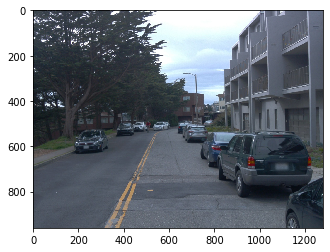

In [159]:
#Show the original version of the '1.jpg'
plt.imshow(image_test)
print('image_origianl_shape',image_test.shape)

In [77]:
#Dive into different Data transforms

In [162]:
t1=ConvertFromInts()
t2=ToPercentCoords()
t3=Resize(300)
t4=SubtractMeans([123, 117, 104])

In [164]:
#t1 is ConvertFromInts, which is to convert the original type'int' into 'float'
img,box,label=t1(image_test,box_test,label_test)
print('img',img)
print('box',box)
print('label',label)

img [[[122. 125. 158.]
  [201. 205. 232.]
  [217. 222. 241.]
  ...
  [104. 111. 130.]
  [105. 110. 130.]
  [103. 108. 128.]]

 [[ 81.  84. 117.]
  [118. 122. 149.]
  [185. 190. 209.]
  ...
  [104. 111. 130.]
  [103. 108. 128.]
  [102. 107. 127.]]

 [[ 70.  73. 108.]
  [ 75.  79. 108.]
  [ 81.  86. 105.]
  ...
  [103. 109. 131.]
  [102. 107. 129.]
  [101. 106. 128.]]

 ...

 [[ 79.  87. 100.]
  [ 79.  87. 100.]
  [ 78.  86.  99.]
  ...
  [ 44.  54.  66.]
  [ 44.  52.  65.]
  [ 43.  51.  64.]]

 [[ 80.  88. 101.]
  [ 80.  88. 101.]
  [ 79.  87. 100.]
  ...
  [ 45.  54.  69.]
  [ 44.  53.  68.]
  [ 43.  52.  67.]]

 [[ 79.  87. 100.]
  [ 79.  87. 100.]
  [ 78.  86.  99.]
  ...
  [ 44.  53.  68.]
  [ 43.  52.  67.]
  [ 42.  51.  66.]]]
box [[ 576.61536  486.0085   583.28876  493.5876 ]
 [ 657.8879   502.11404  736.5387   569.37836]
 [ 636.4376   497.1403   689.3482   544.9832 ]
 [ 497.01117  487.19275  519.8914   543.56213]
 [ 668.1363   506.85098  777.7708   586.43134]
 [1110.2493   709.3

In [166]:
#t2 is ToPercentCoords()， which is to convert the coordinates into the percentage-version
img,box,label=t2(img,box,label) 
print('img',img)
print('box',box)
print('label',label)

img [[[122. 125. 158.]
  [201. 205. 232.]
  [217. 222. 241.]
  ...
  [104. 111. 130.]
  [105. 110. 130.]
  [103. 108. 128.]]

 [[ 81.  84. 117.]
  [118. 122. 149.]
  [185. 190. 209.]
  ...
  [104. 111. 130.]
  [103. 108. 128.]
  [102. 107. 127.]]

 [[ 70.  73. 108.]
  [ 75.  79. 108.]
  [ 81.  86. 105.]
  ...
  [103. 109. 131.]
  [102. 107. 129.]
  [101. 106. 128.]]

 ...

 [[ 79.  87. 100.]
  [ 79.  87. 100.]
  [ 78.  86.  99.]
  ...
  [ 44.  54.  66.]
  [ 44.  52.  65.]
  [ 43.  51.  64.]]

 [[ 80.  88. 101.]
  [ 80.  88. 101.]
  [ 79.  87. 100.]
  ...
  [ 45.  54.  69.]
  [ 44.  53.  68.]
  [ 43.  52.  67.]]

 [[ 79.  87. 100.]
  [ 79.  87. 100.]
  [ 78.  86.  99.]
  ...
  [ 44.  53.  68.]
  [ 43.  52.  67.]
  [ 42.  51.  66.]]]
box [[0.45048076 0.50625885 0.45569435 0.5141537 ]
 [0.5139749  0.52303547 0.57542086 0.59310246]
 [0.49721688 0.51785445 0.5385533  0.56769085]
 [0.38829    0.5074924  0.40616518 0.56621057]
 [0.5219815  0.5279698  0.6076335  0.61086595]
 [0.8673822  0.7389